# Various Approaches to ML: Part 1

## Hello World

Hello, this is a series of notebooks dedicated to approaching machine learning (ML) problems in different ways. The overall goal of machine learning is to being able to develop a reliable model that has high prediction accuarcy. I have noticed many kaggelers asking questions such as how to approach ML problems. There is no wrong way to approaching but there are ways to getting great results (given the data is not junk). One thing to keep in mind is that machine learning is dynamic, therefore not one approach is going to give you the right answer everytime and may require trial by fire.<b> The goal of this series is to demonstrate a few different approaches while incorporating a general flow. </b> Typically you want to clean the data, perform EDA, then apply some sort of preprocess-feature selection (either order) then model and set hyperparameters. So I hope you will stick around to see different ways that I approach problems. I will be incoporating different data sets into this series.

<b> Please upvote or comment if you see something that I could do different or that you like! </b>

## Part 1: Heart Classification Data
## Part 2: Fetal Health Data
## Part 3: Wisconsin Breast Cancer Data

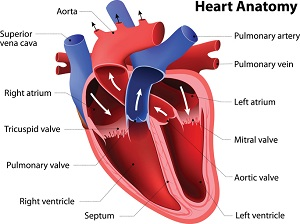

# Importing relevant libraries.
Lets first import relevant libraries to get us started.

In [ ]:
!pip install seaborn --upgrade #Update Seaborn for plotting

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Plotting Functions
import matplotlib.pyplot as plt

#Aesthetics
import seaborn as sns
sns.set_style('ticks') #No grid with ticks
print(sns.__version__)

# Importing the data
Lets first look at the heart disease uci data. We will print the info to check for null values then show the first 5 rows of the data set.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
heart=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
heart.info()
heart.head()

We see there is no null values. Upon inspection of the table we see that there are only 0-3. Lets print out those features to see how high they go.

In [ ]:
heart_list=['sex','cp', 'fbs', 'restecg','exang', 'slope','ca','thal']

for label in heart_list:
    if heart[label].max()==1:
        print(label, 'is only categorical!')
    else:
        print(label, 'is ordinal with values of', sorted(heart[label].unique()))

Now that we know what type of data we have lets move right into exploratory data analysis (EDA).
# EDA
The purpose of EDA is to get a feel for the data. You should not start modeling until feeling out the data first. I will first show a script for a plotter function I use will makes easy reproducible figures that are publication quality. They are based on seaborn plotting and require few lines of code whenever you do want to plot. 

## Plotter

In [ ]:
def Plotter(plot, x_label, y_label, x_rot=None, y_rot=None,  fontsize=12, fontweight=None, legend=None, save=False,save_name=None):
    """
    Helper function to make a quick consistent plot with few easy changes for aesthetics.
    Input:
    plot: sns or matplot plotting function
    x_label: x_label as string
    y_label: y_label as string
    x_rot: x-tick rotation, default=None, can be int 0-360
    y_rot: y-tick rotation, default=None, can be int 0-360
    fontsize: size of plot font on axis, defaul=12, can be int/float
    fontweight: Adding character to font, default=None, can be 'bold'
    legend: Choice of including legend, default=None, bool, True:False
    save: Saves image output, default=False, bool
    save_name: Name of output image file as .png. Requires Save to be True.
               default=None, string: 'Insert Name.png'
    Output: A customized plot based on given parameters and an output file
    
    """
    #Ticks
    ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
    plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation=x_rot)
    plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)
    
    #Legend
    if legend==None:
        pass
    elif legend==True:
        plt.legend()
        ax.legend()
        pass
    else:
        ax.legend().remove()
        
    #Labels
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color='k')
    plt.ylabel(y_label, fontsize=fontsize, fontweight=fontweight, color='k')

    #Removing Spines and setting up remianing, preset prior to use.
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
    
    if save==True:
        plt.savefig(save_name)

## Univariate
Lets look at our categorical and numerical data first individually to understand it.

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.countplot(data=heart, x='target', hue='sex', palette=sns.color_palette("mako"))
Plotter(plot, 'target', 'count', legend=True, save=True, save_name='Heart Disease Count.png')

Plotting for our target for heart disease, we see that the data is almost balanced meaning we will not have to worry about target bias in modeling later. Plotting by gender as well shows that there are more cases of gender 1, this may hint that it may not be too important later. Lets put age into a histogram and see if it makes a difference.

In [ ]:
fig, ax=plt.subplots()
plot=sns.histplot(data=heart, x='age', hue='target', element='step',stat='density',kde=True, palette=sns.color_palette("mako",2))
Plotter(plot, 'age', 'density', legend=None, save=True, save_name='Age_Hist.png')#For histplots set legend to None. I do not know why the function does not work properly for histplots

It looks like those between the age of 40-55 are most at risk of getting the disease. Lets continue to bivariate.
## Bivariate
Now we will look at two variables at the same time and see if there is separation.

In [ ]:
fig, ax=plt.subplots()
plot=sns.scatterplot(data=heart, x='age', y='trestbps',hue='target', palette=sns.color_palette("mako",2))
Plotter(plot, 'age', 'trestbps', legend=True, save=True, save_name='Age_Trest.png')

There really is not too much of a difference here. Lets look at other factors.

In [ ]:
fig, ax=plt.subplots()
plot=sns.boxplot(data=heart, x='thal', y='thalach',hue='target', palette=sns.color_palette("mako",2))
Plotter(plot, 'thal', 'thalach', legend=True, save=True, save_name='target_thal.png')

Again, we do not see much different here. We can summarize the data in a multivariate manner by plotting a pairplot.

In [ ]:
sns.pairplot(data=heart, hue='target',palette=sns.color_palette("mako",2))

We really do not see too much separation. Lets look at pearson correlation coefficients to see if there is any dependencies within the data.

In [ ]:
fig, ax=plt.subplots(figsize=(9,9))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.heatmap(heart.corr(),annot=True, cmap='Blues', linewidths=1)
Plotter(plot, None, None, 90,legend=False, save=True, save_name='Corr.png')

Based on the correlation matrix there is some moderate correlation on target in presence of certain features. We will apply a feature selection tool to tell us but first we will run train-test split.

# Splitting the Data
As part of ML we split our data set into a training and validation datasets, or in this case a training and testing set as there is no separate file provided. We will then scale the data and move into feature selection.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(heart.drop(['target'], axis=1), heart['target'],test_size=0.30, random_state=0)

#Scaling the Data
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()
X_train_ss=scaler.fit_transform(X_train)
X_test_ss=scaler.transform(X_test)

Now that the data is split and scaled. Lets move into feature selection.
The MLxtend library provided various tools for feature selection. I decided to look at sequential feature selection as oppossed to recursive feature selection cause I want to algorithm to either eliminate or add features not just remove. (May take a few minutes)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier as RFC

feature_names=list(X_train.columns)
feature_names
rfc=RFC(n_estimators=250, criterion='entropy', random_state=1)


#Setting SFS
sfs=SFS(estimator=rfc,
       k_features='best',
       forward=False,#Backwards elimination
       floating=True,#floating true, takes whole feature set
       scoring='accuracy',
       cv=5,
       verbose=0)#Shows progress, I set this to 0 to save space

#Fitting the model
sfs.fit(X_train_ss, y_train, custom_feature_names=feature_names)

#Results
print('Best Features are', sfs.k_feature_names_)
print('Best Features by index are', sfs.k_feature_idx_)
print('Best Score', sfs.k_score_)

#Transforming data
X_train_fet=sfs.transform(X_train_ss)#Set new variables
X_test_fet=sfs.transform(X_test_ss)
print('New training dimensions are',X_train_fet.shape, 'While testing dimensions are', X_test_fet.shape)

output=pd.DataFrame.from_dict(sfs.get_metric_dict()).T
output.sort_values('avg_score', ascending=False)#Print table with metrics

Now that we have our features selected lets model and predict the data.
# Modeling the Data for Prediction
We will first set up a grid and randomized search functions below.
## Search Function
We can evalute multiple parameters at one using Grid or Randomization Search functions. Grid Search evalutes several input parameters at all combinations input while randomized search looks for the best. Cross-validation is the models self assemessment when trying to find the best parameters on the training data and can be done in "n" amount of replicates.

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools #Used for iterations

### Searcher

In [ ]:
def Searcher(estimator, param_grid, search, train_x, train_y, test_x, test_y,label=None):
    """
    This is a helper function for tuning hyperparameters using the two search methods.
    Methods must be GridSearchCV or RandomizedSearchCV.
    Inputs:
        estimator: Any Classifier
        param_grid: Range of parameters to search
        search: Grid search or Randomized search
        train_x: input variable of your X_train variables 
        train_y: input variable of your y_train variables
        test_x: input variable of your X_test variables
        test_y: input variable of your y_test variables
        label: str to print estimator, default=None
    Output:
        Returns the estimator instance, clf
    """   
    
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=10, #Cross-validation at 10 replicates
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=10,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    # Fit the model
    clf.fit(X=train_x, y=train_y)
    
    #Testing the model
    try:
        if search=='grid':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))
        
            #Defining prints for accuracy metrics of grid
            print("**Grid search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
        elif search == 'random':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))

            #Defining prints for accuracy metrics of grid
          
            print("**Random search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
                 )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) #Exits program if not grid or random
        
    return clf, cfmatrix; #Returns a trained classifier with best parameters

### Confusion Matrix Function
Setting aesthetics for confusion matrices is also easy through using functions as well. As can be seen below. When using this function, all inputs are required except title.

In [ ]:
def plot_confusion_matrix(cm, label,color=None,title=None):
    """
    Plot for Confusion Matrix:
    Inputs:
        cm: sklearn confusion_matrix function for y_true and y_pred as seen in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
        title: title of confusion matrix as a 'string', default=None
        label: the unique label that represents classes for prediction can be done as sorted(dataframe['labels'].unique()).
        color: confusion matrix color, default=None, set as a plt.cm.color, based on matplot lib color gradients
    """
    classes=sorted(label)
    plt.imshow(cm, interpolation='nearest', cmap=color)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black") 

## Modeling with Various Algoirthms
First we will try with simple models such as Logistic Regression, Decision Trees and K-Nearest Neighbors. If those fail then we will look at more powerful models.
### Logistic Regression
Typically used for binary outputs, uses a sigmoid function to determine the probability of a specific binary class (yes or no).

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

#Setting searcher parameters
#Grid Search
log_param={"C":[.01, .1, 1, 5, 10, 100],#Specific parameters to be tested at all combinations
          "max_iter":[100,250,500,750,1000],
          "random_state":[1]}

log_grid, cfmatrix_grid= Searcher(LR(), log_param, "grid", X_train_fet, y_train, X_test_fet, y_test,label='LogReg')

print('_____'*20)

#Randomized Search 
log_dist = {
    "C": np.arange(0.01,100, 0.01),   #By using np.arange it will select from randomized values
    "max_iter": np.arange(100,1000, 5),
    "random_state": [1]}

log_rand, cfmatrix_rand= Searcher(LR(), log_dist, "random", X_train_fet, y_train, X_test_fet, y_test, label='LogReg')

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=heart['target'].unique(), color=plt.cm.cividis) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=heart['target'].unique(), color=plt.cm.cividis) #randomized matrix function

plt.savefig('LogReg_confusion.png')

### Decision Tree
Very simple to understand model that makes decision rulings to predict target values. However, limited by overfitting and sensitive to data variation. (I do not have much hope for this one!).

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC

depth=np.arange(1,20, 1)
#Setting searcher parameters
#Grid Search
dtc_param={"criterion":['entropy',"gini"],
           'max_depth':[None, depth],
    "min_samples_split":np.arange(2,20, 1),
          "min_samples_leaf":np.arange(2,20, 1),
          "random_state":[1]}

dtc_grid, cfmatrix_grid= Searcher(DTC(), dtc_param, "grid", X_train_fet, y_train, X_test_fet, y_test,label='Tree')

print('_____'*20)

#Randomized Search 
dtc_dist = {
    "criterion":['entropy',"gini"],
           'max_depth':[None, depth],
    "min_samples_split":np.arange(2,20, 1),
          "min_samples_leaf":np.arange(2,20, 1),
          "random_state":[1]}

dtc_rand, cfmatrix_rand= Searcher(DTC(), dtc_dist, "random", X_train_fet, y_train, X_test_fet, y_test, label='Tree')

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=heart['target'].unique(), color=plt.cm.cividis) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=heart['target'].unique(), color=plt.cm.cividis) #randomized matrix function

plt.savefig('DTC_confusion.png')

### K-Nearest Neighbors
Seeks the closest distance of nearest neighbors to make a prediction based on a majority vote of nearest data points.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

#Setting searcher parameters
#Grid Search
knn_param={"n_neighbors":[1,2,3,4,5, 10, 15, 20],
           'weights':['uniform','distance'],
    "algorithm":['ball_tree', 'kd_tree', 'brute'],
          "p":[1,2],
          }

knn_grid, cfmatrix_grid= Searcher(KNN(), knn_param, "grid", X_train_fet, y_train, X_test_fet, y_test,label='KNN')

print('_____'*20)

#Randomized Search 
knn_dist = {"n_neighbors":np.arange(1,40,1),
           'weights':['uniform','distance'],
    "algorithm":['ball_tree', 'kd_tree', 'brute'],
          "p":[1,2],
          }

knn_rand, cfmatrix_rand= Searcher(KNN(), knn_dist, "random", X_train_fet, y_train, X_test_fet, y_test, label='KNN')

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=heart['target'].unique(), color=plt.cm.cividis) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=heart['target'].unique(), color=plt.cm.cividis) #randomized matrix function

plt.savefig('KNN_confusion.png')

Even though a better training accuracy was slightly achieved we are having a difficult time distinguishing the remaining 20% of the test data. Lets try some more sophisticated models.
### Support Vector Machine
Using the support vector machines classifiers (SVC) it can handle higher dimensional data and generate hyperplanes for separation and score on a yes (1) no (1) basis.

In [ ]:
from sklearn.svm import SVC #Support Vector Classifier

#Grid Search SVM Parameters
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100], #Specific parameters to be tested at all combinations
    "gamma": [0, .01, .1, 1],
    "kernel": ["rbf","linear","poly"],
    "degree": [3,4],
    "random_state": [1]}

#Randomized Search SVM Parameters
svm_dist = {
    "C": np.arange(0.01,100, 0.01),   #By using np.arange it will select from randomized values
    "gamma": np.arange(0,1, 0.01),
    "kernel": ["rbf","linear","poly"],
    "degree": [3,4],
    "random_state": [1]}

#Grid Search 
svm_grid, cfmatrix_grid= Searcher(SVC(), svm_param, "grid", X_train_fet, y_train, X_test_fet, y_test,label='SVC')

print('_____'*20)#Spacer

#Random Search
svm_rand, cfmatrix_rand= Searcher(SVC(), svm_dist, "random", X_train_fet, y_train, X_test_fet, y_test,label='SVC')

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=heart['target'].unique(), color=plt.cm.cividis) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=heart['target'].unique(), color=plt.cm.cividis) #randomized matrix function
plt.savefig('SVM_confusion.png')

### Random Forest (again)
Since we took our selected features from random forest lets try this model out anyway. Random forest is an ensemble method that estimates several weak decision trees and combines the mean to create an uncorrelated forest at the end. The uncorrelated forest should be able to predict more accurately than an individual tree.

In [ ]:
#Grid Search RFC Parameters
rfc_param = {
    "n_estimators": [10, 50, 75, 100, 150,200], #Specific parameters to be tested at all combinations
    "criterion": ['entropy','gini'],
    "random_state": [1],
    "max_depth":np.arange(1,16,1)}

#Randomized Search RFC Parameters
rfc_dist = {
    "n_estimators": np.arange(10,200, 10),   #By using np.arange it will select from randomized values
    "criterion": ['entropy','gini'],
    "random_state": [1],
    "max_depth":np.arange(1,16,1)}

#Grid Search RFC
rfc_grid, cfmatrix_grid= Searcher(RFC(), rfc_param, "grid", X_train_fet, y_train, X_test_fet, y_test,label='RFC')

print('_____'*20)#Spacer

#Random Search RFC
rfc_rand, cfmatrix_rand= Searcher(RFC(), rfc_dist, "random", X_train_fet, y_train, X_test_fet, y_test,label='RFC')

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=heart['target'].unique(), color=plt.cm.cividis) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=heart['target'].unique(), color=plt.cm.cividis) #randomized matrix function
plt.savefig('RFC_confusion.png')

### Multi-Layer Perceptron
Feed-forward neural network. Very simple compared to using tensor flow or keras,however, may not be as powerful. The number of nodes are determined by (2/3 * input feature count) + (number of output + 2). The number of layers were decided by 2/3 of the first and 1/2 the second layer. We can paramterize plenty of activator functions and set this up with the search function above. Running the searches with this code may take about 30-60min.

In [ ]:
from sklearn.neural_network import MLPClassifier as MLP

#Grid Search MLP Parameters
mlp_param = {
    "hidden_layer_sizes": [(9,),(9,6),(9,6,3),(9,6,3,1)], #Specific parameters to be tested at all combinations
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "max_iter":[200,400,600,800,1000],
    "solver":['lbfgs', 'sgd', 'adam'],
    "learning_rate_init":[0.01],
    "learning_rate":['constant','adaptive'],
    "random_state": [1]}

#Randomized Search MLP Parameters
sini=np.arange(6,9,1)
on_si=np.arange(1,6,1)
on_th=np.arange(1,3,1)
mlp_dist = {
    "hidden_layer_sizes": [(9,),(9,6),(9,6,3),(9,6,3,1)], #Specific parameters to be tested at all combinations
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "max_iter":np.arange(100,1000, 100),
    "solver":['lbfgs', 'sgd', 'adam'],
    "learning_rate_init":np.arange(0.001,0.01,0.001),
    "learning_rate":['constant','adaptive'],
    "random_state": [1]}

#Grid Search SVM
mlp_grid, cfmatrix_grid= Searcher(MLP(), mlp_param, "grid", X_train_fet, y_train, X_test_fet, y_test,label='MLP')

print('_____'*20)#Spacer

#Random Search SVM
mlp_rand, cfmatrix_rand= Searcher(MLP(), mlp_dist, "random", X_train_fet, y_train, X_test_fet, y_test,label='MLP')

#Plotting the confusion matrices
plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=heart['target'].unique(), color=plt.cm.cividis) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=heart['target'].unique(), color=plt.cm.cividis) #randomized matrix function
plt.savefig('MLP_confusion.png')

# Conclusion
We observed that:
* We can use sequential feature selection in tandem with a classifier to provide us with the best features for machine learning.
* Using simplistic models can guide us for the need for more sophisticated models
* Again, there is no one sole method to machine learning as I will show in parts two and three.
* Our modeling overall has scored around ~80% at 30% train-test-split, therefore some parts of the data may just have some overlap that are outliers.

# Next Steps
In the next two notebooks we will see the application of KBest feature selection and compare dimensionality reduction techniques such as PCA and LDA to cluster data. These will be other approaches to selecting features.

# Notebooks:
Various Approaches to ML: Part 2: Soon to be published  
Various Approaches to ML: Part 3: Not yet started!

## Suggestions?

### If you stuck around to the end please leave a comment for feedback or upvote!</b>

Like what I have done? Check out my other notebooks here: https://www.kaggle.com/christopherwsmith  

Selected Notebooks That Are Helpful!  
https://www.kaggle.com/christopherwsmith/classify-that-penguin-100-accuracy

https://www.kaggle.com/christopherwsmith/tutorial-quick-custom-and-helpful-functions

https://www.kaggle.com/christopherwsmith/how-to-predict-lung-cancer-levels-100-accuracy